# The Sparks Foundation [GRIP: Dec, 2022]
## Data Science and Business Analytics Internship
#### **Task 3:** Exploratory Data Analysis - Retail [Level: Beginner]
- **Problem Statement:** Perform EDA on the given 'SampleSuperstore' dataset to find out the areas where you as a business manager can make more profit

#### **Author:** Rohit Rannavre

In [1]:
# importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
df = pd.read_csv('/content/dataset_3.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# checking the shape of the dataset
df.shape

(9994, 13)

In [4]:
# checking datatypes, missing values etc of the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
# getting a statistical summary of the dataset
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
# checking duplicates
df.duplicated().sum()

17

In [7]:
# removing the duplicates
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

0

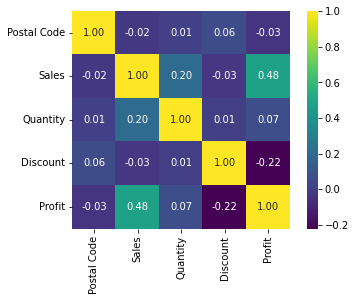

In [8]:
# plotting the correlation between the features
sns.heatmap(data=df.corr(), annot=True, fmt='.2f', square=True, cmap='viridis');

> **Feature:** Ship Mode

> **Observation:**
- There are 4 shipping modes namely Standard Class, Second Class,  First Class and Same Day
- Consumers seem to prefer the Standard Class

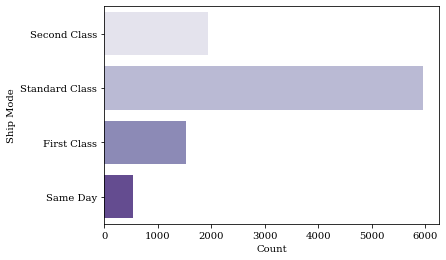

In [9]:
# 'Ship Mode' visualization
sns.countplot(data=df, y='Ship Mode', palette='Purples')
plt.xlabel('Count', family='serif')
plt.ylabel('Ship Mode', family='serif')
plt.xticks(family='serif')
plt.yticks(family='serif');

> **Feature:** Segment

> **Observation:**
- There are 3 segments - Consumer, Corporate and Home Office

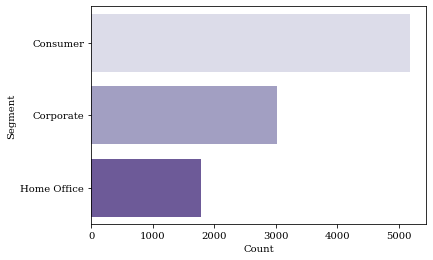

In [10]:
# 'Segment' visualization
sns.countplot(data=df, y='Segment', palette='Purples')
plt.xlabel('Count', family='serif')
plt.ylabel('Segment', family='serif')
plt.xticks(family='serif')
plt.yticks(family='serif');

> **Feature:** City

> **Observation:**
- There are 531 cities listed
- New York, Los Angeles, Seattle, San Francisco and Detroit are the top 5 states with the *maximum* profit while Philadelphia, Houston, San Antonio,  Lancaster and Chicago with the *minimum*
- New York, Los Angeles, Seattle, San Francisco and Philadelphia are the top 5 states with the *maximum* sales while Ormond Beach, Pensacola, Jupiter, Elyria, and Abilene with the *minimum*

In [11]:
# checking the total number of cities listed
df['City'].nunique()

531

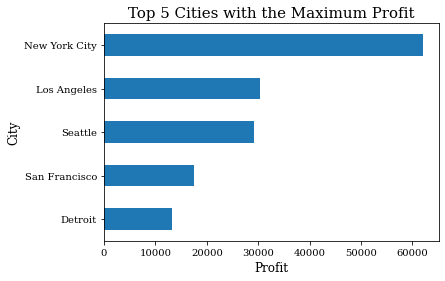

In [12]:
# top 5 cities with the maximum profit
df.groupby('City')['Profit'].apply(np.sum).nlargest(5).sort_values(ascending=True).plot.barh()
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Profit', family='serif', size=12)
plt.ylabel('City', family='serif', size=12)
plt.title('Top 5 Cities with the Maximum Profit', size=15, family='serif');

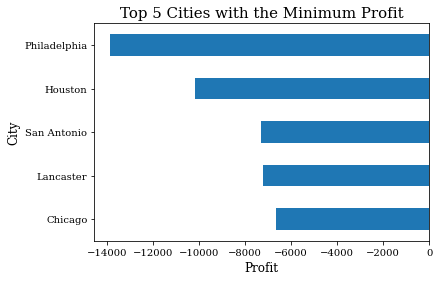

In [13]:
# top 5 cities with the minimum profit
df.groupby('City')['Profit'].apply(np.sum).nsmallest(5).sort_values(ascending=False).plot.barh()
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Profit', family='serif', size=12)
plt.ylabel('City', family='serif', size=12)
plt.title('Top 5 Cities with the Minimum Profit', size=15, family='serif');

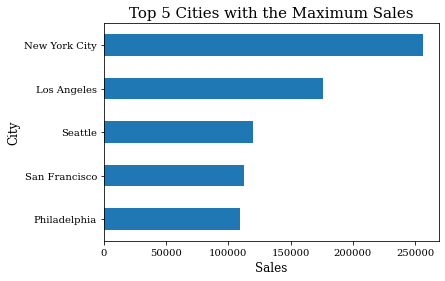

In [14]:
# top 5 cities with the maximum sales
df.groupby('City')['Sales'].apply(np.sum).nlargest(5).sort_values(ascending=True).plot.barh()
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Sales', family='serif', size=12)
plt.ylabel('City', family='serif', size=12)
plt.title('Top 5 Cities with the Maximum Sales', size=15, family='serif');

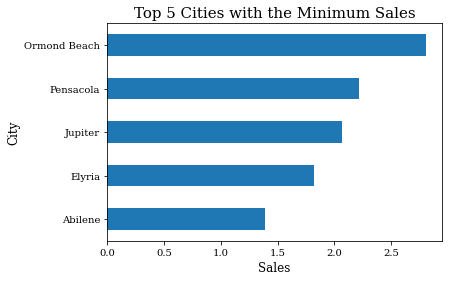

In [15]:
# top 5 cities with the minimum sales
df.groupby('City')['Sales'].apply(np.sum).nsmallest(5).sort_values(ascending=True).plot.barh()
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Sales', family='serif', size=12)
plt.ylabel('City', family='serif', size=12)
plt.title('Top 5 Cities with the Minimum Sales', size=15, family='serif');

> **Feature:** State

> **Observation:**
- There are 49 unique states in the dataset
- Top 5 states with the maximum consumers are California, New York, Texas, Pennsylvania, and Washington

In [16]:
# checking the number of unique states
df['State'].nunique()

49

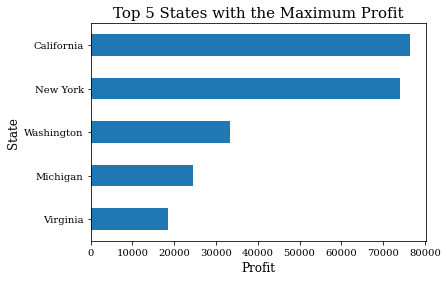

In [17]:
# checking top 5 states with the maximum profit
df.groupby('State')['Profit'].apply(np.sum).nlargest(5).sort_values(ascending=True).plot.barh()
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Profit', family='serif', size=12)
plt.ylabel('State', family='serif', size=12)
plt.title('Top 5 States with the Maximum Profit', size=15, family='serif');

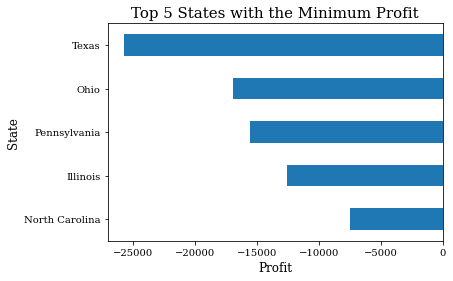

In [18]:
# checking top 5 states with the minimum profit
df.groupby('State')['Profit'].apply(np.sum).nsmallest(5).sort_values(ascending=False).plot.barh()
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Profit', family='serif', size=12)
plt.ylabel('State', family='serif', size=12)
plt.title('Top 5 States with the Minimum Profit', size=15, family='serif');

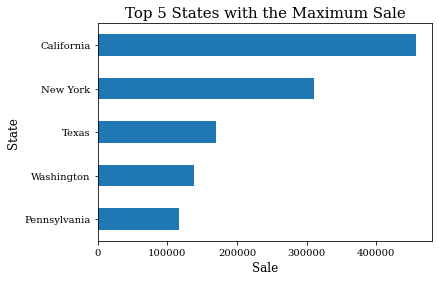

In [19]:
# checking top 5 states with the maximum sale
df.groupby('State')['Sales'].apply(np.sum).nlargest(5).sort_values(ascending=True).plot.barh()
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Sale', family='serif', size=12)
plt.ylabel('State', family='serif', size=12)
plt.title('Top 5 States with the Maximum Sale', size=15, family='serif');

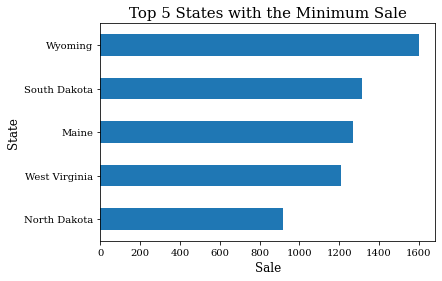

In [20]:
# checking top 5 states with the minimum sale
df.groupby('State')['Sales'].apply(np.sum).nsmallest(5).sort_values(ascending=True).plot.barh()
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Sale', family='serif', size=12)
plt.ylabel('State', family='serif', size=12)
plt.title('Top 5 States with the Minimum Sale', size=15, family='serif');

> **Feature:** Region

> **Observation:**
- There are 4 regions: south, west, east and central
- West region has more buyers while the central the least
- West region has witnessed more profit and sales compared to other regions  

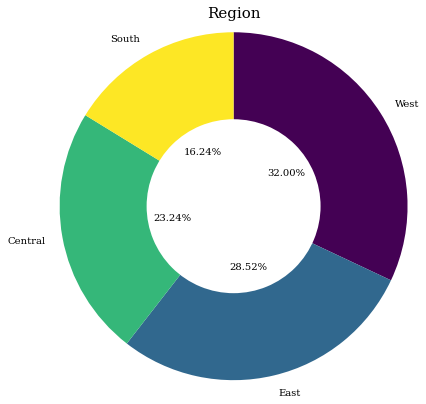

In [21]:
# pie plot of 'Region'
x = df['Region'].value_counts(normalize=True).plot.pie(autopct='%.2f%%', pctdistance=.36, radius=2, counterclock=False, 
                                                       startangle=90, textprops=dict(family='serif'), cmap='viridis')
plt.pie(x=[1], radius=1, colors=['w'])
plt.title('Region', pad=80, size=15, family='serif')
plt.ylabel(' ');

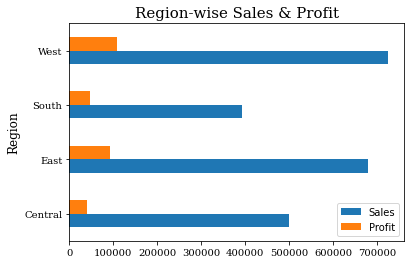

In [22]:
# region-wise sales and profit 
df.groupby(by='Region')[['Sales', 'Profit']].sum().plot.barh(figsize=(6,4))
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.ylabel('Region', size=12, family='serif')
plt.title('Region-wise Sales & Profit', size=15, family='serif');

> **Feature:** Category

> **Observation:**

- There are 3 categories: Office Supplies, Technology, Furniture
- Office Supplies category tops the list

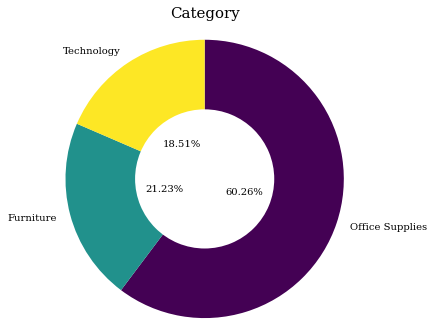

In [23]:
# pieplot of 'Category'
x = df['Category'].value_counts(normalize=True).plot.pie(autopct='%.2f%%', pctdistance=.3, radius=1.6, counterclock=False,  
                                                         startangle=90, textprops=dict(family='serif'), cmap='viridis')
plt.pie(x=[1], radius=.8, colors=['w'])
plt.title('Category', pad=52, size=15, family='serif')
plt.ylabel(' ');

> **Feature:** Sub-Category

> **Observation:**
- There are in total 17 unique sub-categories
- 'Binders' is the most saught-after sub-category while the 'Copies' the least

In [24]:
# checking the number of unique sub-categories
df['Sub-Category'].nunique()

17

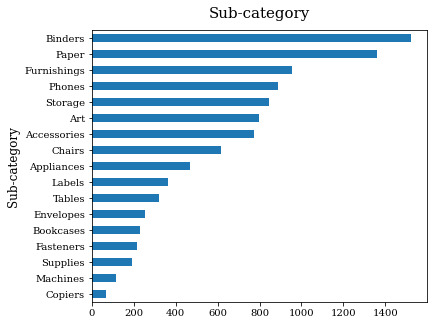

In [25]:
# bar of 'Sub-Category'
df['Sub-Category'].value_counts().sort_values(ascending=True).plot.barh(figsize=(6, 5))
plt.title('Sub-category', pad=12, size=15, family='serif')
plt.ylabel('Sub-category', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif');

> **Feature:** Quantity

> **Observation:**
- Preferred quantity is 2 and 3

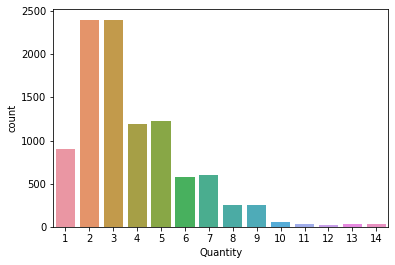

In [26]:
sns.countplot(data=df, x='Quantity');

> **Feature:** Discount

> **Observation:**
- Many items come with 20% discount but the majority go undiscounted

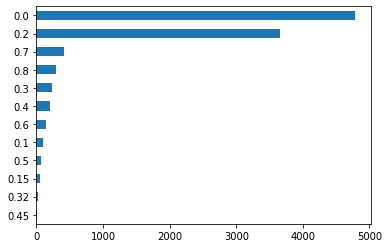

In [27]:
df['Discount'].value_counts().sort_values(ascending=True).plot.barh();